In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
surv_data = pd.read_csv('train.csv', index_col='PassengerId')
surv_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


# Context

In [51]:
surv_data.shape

(100000, 11)

In [52]:
surv_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

В таблице содержится информация о 100000 пассажирах, а также 11 колонок. 

Будем искать зависимости столбца 'Survived' (выжил) от имеющихся данных: 

- проверим, влияет ли возраст, пол и цена билета на выживаемость,

- есть ли какие-то другие неочевидные связи.

# Data quality assessment

**Посмотрим, есть ли пропуски в данных.**

In [53]:
surv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


В колонках Age, Ticket, Fare, Cabin и Embarked есть ряды с пустыми значениями.

Посмотрим на пассажиров, для которых не указан возраст (Age):

In [54]:
surv_data[surv_data['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
34,1,2,"Mcmullen, Delores",female,NaN,0,0,15940,33.66,NaN,C
35,0,3,"Hall, Booker",male,NaN,0,0,422605,5.77,NaN,C
36,1,1,"Crowder, Nicole",female,NaN,0,0,341631,60.02,C19277,Q
...,...,...,...,...,...,...,...,...,...,...,...
99772,0,1,"Hash, William",male,NaN,0,2,26338,107.30,B21753,C
99876,1,3,"Maresco, Michael",male,NaN,0,0,410800,22.64,NaN,C
99971,0,3,"Teague, Robert",male,NaN,0,0,PP 12794,7.78,NaN,S


Видим, что для этих пассажиров указаны другие важные характеристики, такие как пол (Sex), класс (Pclass)  и другие. Значит поля с пустыми значениями пока удалять не будем. Для анализа данных с использованием колонки Age (или других, где есть пустые значения) предварительно исключим пустые данные.

Посмотрим, содержит ли в себе таблица грубые дубликаты:

In [55]:
surv_data.duplicated().sum()

0

Посмотрим на количество уникальных значений в некоторых столбцах:

In [56]:
surv_data['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

**Выжило меньше людей.**

In [57]:
surv_data['Pclass'].value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

Видим, что тип данных целое число (1, 2, 3), в то время как, класс, которым путешествовал пассажир - это категориальная переменная. Изменим классы 1, 2, 3 на  'A', 'B', 'C'.

In [58]:
d_class = {1: 'A', 2: 'B', 3: 'C'}
surv_data['Pclass'] = surv_data['Pclass'].replace(d_class).astype(object)
surv_data['Pclass'].value_counts()

C    41006
A    30315
B    28679
Name: Pclass, dtype: int64

In [59]:
surv_data['Sex'].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

На борту было больше мужчин чем женщин.

In [60]:
surv_data['SibSp'].value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

In [61]:
surv_data['Parch'].value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

Большинство путешествовало без родственников.

In [62]:
surv_data['Embarked'].value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [63]:
surv_data['Age'].value_counts()

25.0    2354
23.0    2345
26.0    2320
24.0    2298
27.0    2088
        ... 
78.5       1
14.5       1
13.5       1
69.5       1
87.0       1
Name: Age, Length: 173, dtype: int64

Возраст - это исчисляемая переменная. Будет полезно сделать отдельную колонку с присвонием каждому возрасту своей категории. Назовем ее 'Age_group'

In [64]:
surv_data['Age_group'] = surv_data.apply(lambda x: '0-19' if x['Age'] < 20 \
                                         else '20-39' if x['Age'] < 40  \
                                         else '40-59' if x['Age'] < 60  \
                                         else '60-99' if x['Age'] < 100 \
                                         else 'NaN', axis=1)
surv_data['Age_group'].value_counts()

20-39    36066
40-59    33811
0-19     13610
60-99    13221
NaN       3292
Name: Age_group, dtype: int64

# Data exploration

Посмотрим на некоторые характеристики дискретных переменных.

In [65]:
surv_data.describe()

,Survived,Age,SibSp,Parch,Fare
count,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,38.355472,0.397690,0.454560,43.92933
std,0.494753,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,87.000000,8.000000,9.000000,744.66000


**Некоторые статичтические данные:**

Стамому младшему пассажиру не было даже 1 года, а самому старшему - 87 лет.

Посмотрим, распределение пассажиров по возрастам:

Text(0, 0.5, 'Density')

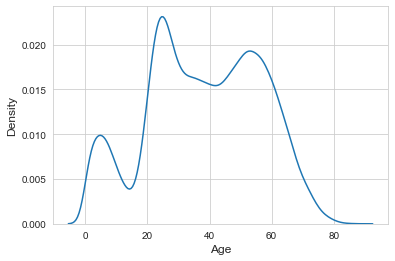

In [66]:
sns.kdeplot(data=surv_data, x='Age')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

Самое большое количество братьев/сестер и жен/мужей на борту для одного человека 8, а вот детей/родителей 9.

Посмотрим на распределение этих данных.

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

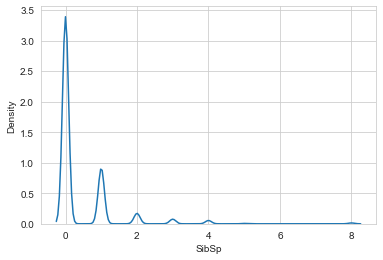

In [67]:
sns.kdeplot(data=surv_data, x='SibSp')

<AxesSubplot:xlabel='Parch', ylabel='Density'>

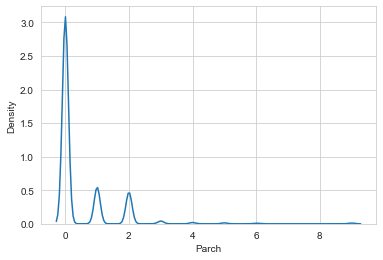

In [68]:
sns.kdeplot(data=surv_data, x='Parch')

Большинство пассажиров путешествовали в одиночку.



Самый дорогой билет стоил 744.66, а самый дешевый 0.68. Это очень большая разбежка. Посмотрим на распределение стоимости билетов:

<AxesSubplot:xlabel='Fare', ylabel='Density'>

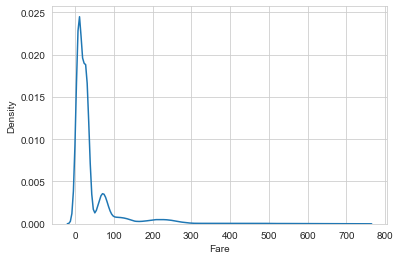

In [69]:
sns.kdeplot(data=surv_data, x='Fare')

Интересно посмотреть выжил ли пассажир, купивший самый дорогой билет?

In [70]:
surv_data[surv_data['Fare'] == max(surv_data['Fare'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
40061,1,A,"Harper, Dannie",male,58.0,0,1,7468,744.66,C10375,Q,40-59


Да, к счастью он выжил. Возможно есть связь между ценой билета и выживаемостью? А выжил ли пассажир, купивший самый дешевый билет?

In [71]:
surv_data[surv_data['Fare'] == min(surv_data['Fare'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
42232,0,C,"French, Eugene",male,26.0,0,0,399709,0.68,NaN,S,20-39


К сожалению - нет. Возможно зависимость и правда есть. Давайте построим график 

Text(0, 0.5, 'Fare')

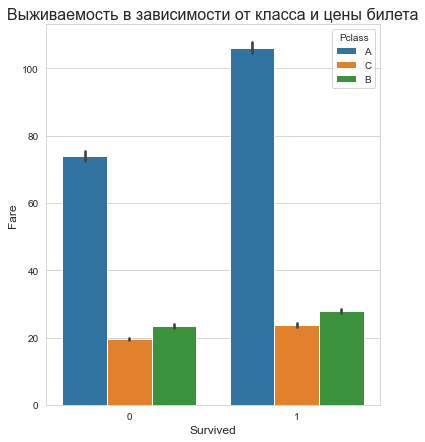

In [72]:
#Создадим таблицу данных без пустых значений в колонке 'Fare'
surv_data_drop_fare = surv_data.dropna(subset=['Fare'])

plt.figure(figsize=(6, 7))
sns.set_style('whitegrid')
sns.barplot(x=surv_data_drop_fare['Survived'], y=surv_data_drop_fare['Fare'], hue=surv_data_drop_fare['Pclass'])
plt.title('Выживаемость в зависимости от класса и цены билета', fontsize = 16)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Fare', fontsize=12)

Похоже, что те, кто, в среднем, платил больше в любом классе, выживали с немного большей вероятностью. Это зависимость выражена сильнее для класса А.


Посмотрим, какие еще зависимости можно увидеть, построив парные графики. Выделим оранжевым цветом выживших.

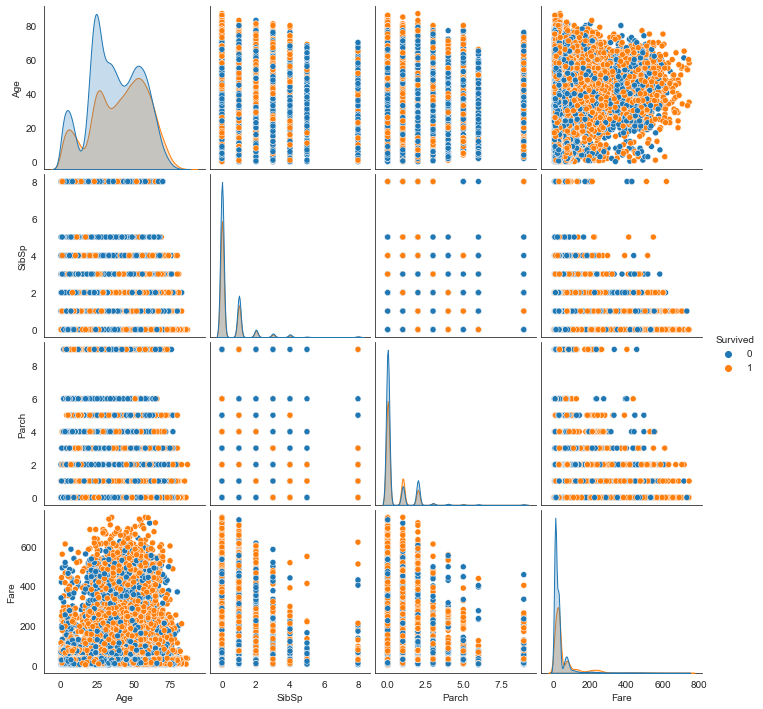

In [73]:
sns.set_style('white')
sns.pairplot(data=surv_data, hue='Survived')

**Проверим зависимости между выжившими и возрастом, и выжившими и числом родственников на борту.**

Начнем с возраста. Посколько были данные с пустыми значениями в колонке 'Age' - удалим их.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

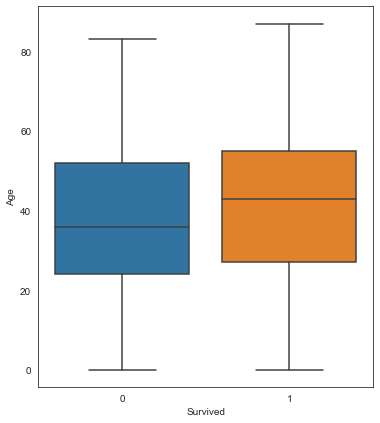

In [74]:
surv_data_drop_age = surv_data.dropna(subset=['Age'])

plt.figure(figsize=(6, 7))
sns.boxplot(x='Survived', y='Age', data=surv_data_drop_age)

Хоть возраст распределен относительно равномерно среди выживших и нет, есть небольшое смещение 50% квартиля по возрасту. 
Среди выживших 50% пассажиров немного старше чем 50% пассажиров в соседней группе.

Возможно, распределение количества выживших по возрастным группам будет более показательным?

Text(0, 0.5, 'Quantity')

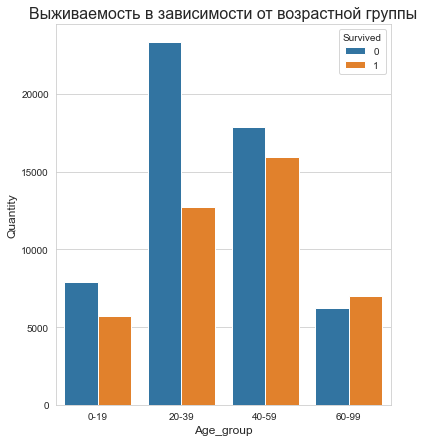

In [75]:
gr_by_agegroup = surv_data_drop_age.groupby(['Survived','Age_group'])['Name'].count() \
                                    .reset_index().rename(columns={'Name' : 'Quantity'})

plt.figure(figsize=(6, 7))
sns.set_style('whitegrid')
sns.barplot(x=gr_by_agegroup['Age_group'], y=gr_by_agegroup['Quantity'], hue=gr_by_agegroup['Survived'])
plt.title('Выживаемость в зависимости от возрастной группы', fontsize = 16)
plt.xlabel('Age_group', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

Так как, в целом, выживших меньше, в каждой возрастной группе их тоже меньше, кроме последний. В возрастной группе 60-99 - шанс выжить был чуть больше.

Возможно, есть зависимость выжил пассажир или нет от пола?

Text(0, 0.5, 'Quantity')

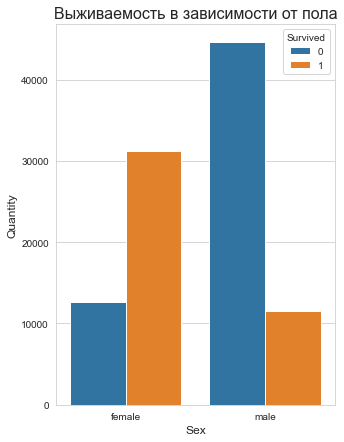

In [76]:
gr_by_surv = surv_data.groupby(['Survived','Sex'])['Name'].count().reset_index().rename(columns={'Name' : 'Quantity'})

plt.figure(figsize=(5,7))
sns.barplot(x=gr_by_surv['Sex'], y=gr_by_surv['Quantity'], hue=gr_by_surv['Survived'])
plt.title('Выживаемость в зависимости от пола', fontsize = 16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

**У женщин шанс выжить гораздо больше, чем у мужчин.**

Проверим совместное влияние возраста и пола на выживаемость.

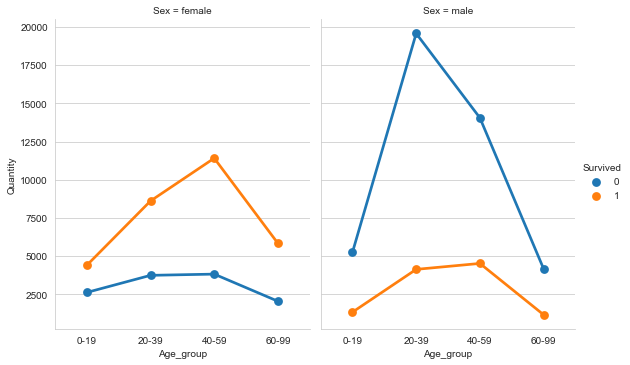

In [77]:
gr_by_agegroup_and_sex = surv_data_drop_age.groupby(['Survived', 'Sex', 'Age_group'])['Name'].count() \
                                    .reset_index().rename(columns={'Name' : 'Quantity'})

sns.catplot(x="Age_group", y="Quantity", hue="Survived", col="Sex", data=gr_by_agegroup_and_sex,  \
            kind="point", height=5, aspect=0.8)

Все же в любой возрастной группе среди выживших женщин больше.

Проверим, повлияло ли на шанс выжить количество родственников на борту

Text(0, 0.5, 'Quantity')

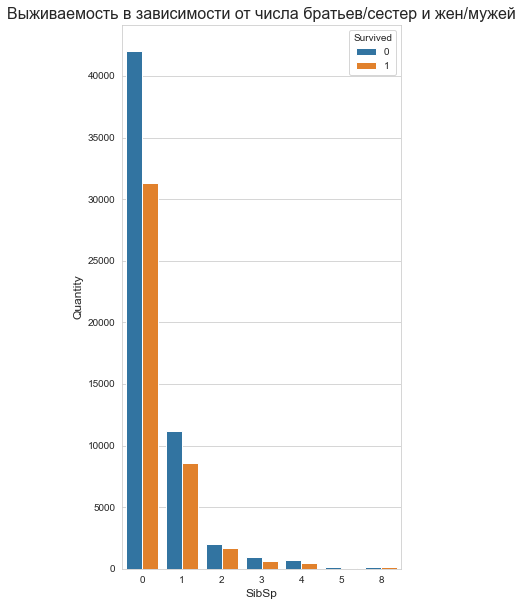

In [78]:
gr_by_sibsp = surv_data.groupby(['Survived', 'SibSp'])['Name'].count() \
                                    .reset_index().rename(columns={'Name' : 'Quantity'})
gr_by_parch = surv_data.groupby(['Survived', 'Parch'])['Name'].count() \
                                    .reset_index().rename(columns={'Name' : 'Quantity'})

plt.figure(figsize=(5,10))
sns.barplot(x=gr_by_sibsp['SibSp'], y=gr_by_sibsp['Quantity'], hue=gr_by_sibsp['Survived'])
plt.title('Выживаемость в зависимости от числа братьев/сестер и жен/мужей', fontsize = 16)
plt.xlabel('SibSp', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

Количество братьев/сестер и жен/мужей не сильно влияло на выживаемость на борту.

Text(0, 0.5, 'Quantity')

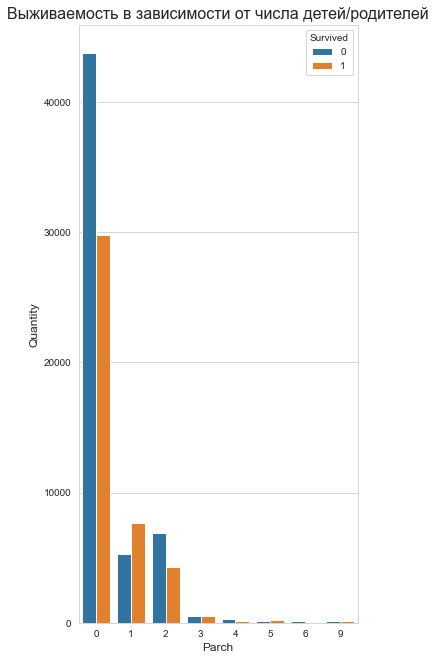

In [79]:
plt.figure(figsize=(5,11))
sns.barplot(x=gr_by_parch['Parch'], y=gr_by_parch['Quantity'], hue=gr_by_parch['Survived'])
plt.title('Выживаемость в зависимости от числа детей/родителей', fontsize = 16)
plt.xlabel('Parch', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

Интересно заметить, что шанс выжить был чуть больше у тех, у кого на борту 1 ребенок/родитель. А также нечетное количество детей/родителей на борту делало шансы выжить более равными, так как в группах с четным количеством, в среднем, эти шансы были меньше, как и по всей статистике в общем.

Возможно пункт посадки на борт пассажира имел вияние на шанс выжить?

Text(0, 0.5, 'Quantity')

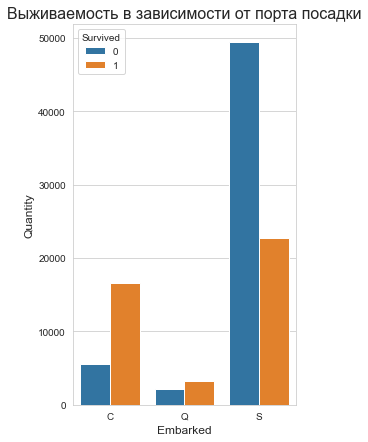

In [80]:
#Создаем таблицу данных без пустых рядов в столбце 'Embarked'
surv_data_drop_embarked = surv_data.dropna(subset=['Embarked'])

gr_by_emb = surv_data_drop_embarked.groupby(['Survived','Embarked'])['Name'].count() \
                                    .reset_index().rename(columns={'Name' : 'Quantity'})

plt.figure(figsize=(4,7))
sns.barplot(x=gr_by_emb['Embarked'], y=gr_by_emb['Quantity'], hue=gr_by_emb['Survived'])
plt.title('Выживаемость в зависимости от порта посадки', fontsize = 16)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

Интересно, что среди тех, кто совершил посадку в портах Cherbourg (С) и Queenstown (Q) шанс выжить был больше. Хотя большинство совершало посадку в пункте Southampton (S).

**Есть такое понятие "счастливый билет".**

*Счастливым считается полученный в общественном транспорте билет, в шестизначном номере которого сумма первых трёх цифр совпадает с суммой трёх последних.*

Проверим, сколько выжило обладателей "счастливых" билетов, и зависит ли разность сумм первых и последних трёх цифр на шанс выжить?

Text(0, 0.5, 'Количество выживших')

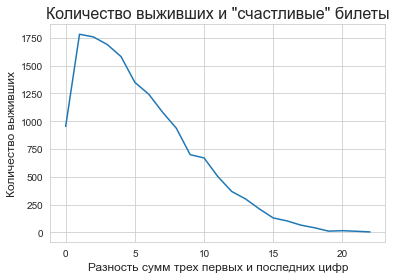

In [81]:
import re

#Создаем таблицу данных без пустых рядов в столбце 'Ticket'
surv_data_drop_ticket = surv_data.dropna(subset=['Ticket'])

#Вставляем в таблицу столбец 'Diff_ticket_numbers', в котором содержится информация о том, 
#насколько отличается сумма трех первых и последних цифр в билетах,
#в которых было 6 цифр
l_diff_ticket_numbers = surv_data_drop_ticket.apply(lambda x: re.findall(r'\d+', x['Ticket']), axis=1)
l_diff = l_diff_ticket_numbers.apply(lambda tick:  \
                                     abs((int("".join(tick)[0]) + int("".join(tick)[1]) + int("".join(tick)[2]))  \
                                        - (int("".join(tick)[3]) + int("".join(tick)[4]) + int("".join(tick)[5]))) \
                                        if len("".join(tick)) == 6 else 'Nan')
surv_data_drop_ticket.insert(loc=len(surv_data_drop_ticket.columns), column='Diff_ticket_numbers', \
                             value = l_diff.values.tolist())

surv_data_drop_ticket_drop_diff = surv_data_drop_ticket[surv_data_drop_ticket['Diff_ticket_numbers'] != 'Nan']

#Посмотрим статистику по выжившим
d_omly_serv = surv_data_drop_ticket_drop_diff[surv_data_drop_ticket_drop_diff['Survived'] == 1]

d_fin = d_omly_serv.groupby(['Diff_ticket_numbers'])['Name'].count().reset_index().rename(columns={'Name' : 'Quantity'})

sns.lineplot(data=d_fin, x='Diff_ticket_numbers', y='Quantity')
plt.title('Количество выживших и "счастливые" билеты', fontsize = 16)
plt.xlabel('Разность сумм трех первых и последних цифр', fontsize=12)
plt.ylabel('Количество выживших', fontsize=12)

Очень интересно, что такая зависимость действительно есть. 
В силу того, что "счастливых" билетов мало - выживших с ними тоже меньше. Посмотрим, сколько всего было "счастливых" билетов:

In [82]:
surv_data_drop_ticket_drop_diff.groupby(['Diff_ticket_numbers', 'Survived'])['Name'].count().head(6)

Diff_ticket_numbers  Survived
0                    0           1285
                     1            953
1                    0           2497
                     1           1783
2                    0           2408
                     1           1759
Name: Name, dtype: int64

Число выживших пассажиров со "счастливым" билетом - 953, а невыживших - 1285. 

Все-таки "счастливый" билет не гарантирует выживание, хоть и увеличивает шансы на жизнь его обладателя.

Возможно есть "счастливая" каюта?

Так как большинство кают имеют 4 цифры сравним сумму двух первых и псоледних цифр:

Text(0, 0.5, 'Количество выживших')

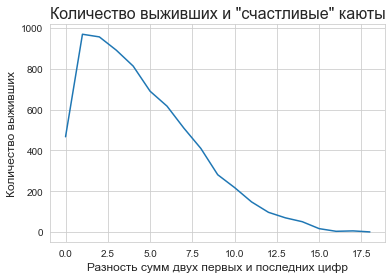

In [83]:
#Создаем таблицу данных без пустых рядов в столбце 'Cabin'
surv_data_drop_cabin = surv_data.dropna(subset=['Cabin'])

#Вставляем в таблицу столбец 'Diff_cabin_numbers', в котором содержится информация о том, 
#насколько отличается сумма двух первых и последних цифр в номере каюты,
#в которых было 4 цифры
l_diff_cabin_numbers = surv_data_drop_cabin.apply(lambda x: re.findall(r'\d+', x['Cabin']), axis=1)
l_diff_c = l_diff_cabin_numbers.apply(lambda cab:  \
                                     abs((int("".join(cab)[0]) + int("".join(cab)[1]))  \
                                        - (int("".join(cab)[2]) + int("".join(cab)[3]))) \
                                        if len("".join(cab)) == 4 else 'Nan')
surv_data_drop_cabin.insert(loc=len(surv_data_drop_cabin.columns), column='Diff_cabin_numbers', \
                             value = l_diff_c.values.tolist())

surv_data_drop_cabin_drop_diff = surv_data_drop_cabin[surv_data_drop_cabin['Diff_cabin_numbers'] != 'Nan']

#Посмотрим статистику по выжившим
d_omly_serv = surv_data_drop_cabin_drop_diff[surv_data_drop_cabin_drop_diff['Survived'] == 1]

d_fin = d_omly_serv.groupby(['Diff_cabin_numbers'])['Name'].count().reset_index().rename(columns={'Name' : 'Quantity'})

sns.lineplot(data=d_fin, x='Diff_cabin_numbers', y='Quantity')
plt.title('Количество выживших и "счастливые" каюты', fontsize = 16)
plt.xlabel('Разность сумм двух первых и последних цифр', fontsize=12)
plt.ylabel('Количество выживших', fontsize=12)

Видим, что и такая зависимость есть.

По аналогии с билетами, проверим "счастливые" каюты на число выживших и нет пассажиров:

In [84]:
surv_data_drop_cabin_drop_diff.groupby(['Diff_cabin_numbers', 'Survived'])['Name'].count().head(6)

Diff_cabin_numbers  Survived
0                   0           326
                    1           467
1                   0           632
                    1           969
2                   0           649
                    1           956
Name: Name, dtype: int64

"Cчастливая" каюта также не гарантирует выживание, но влияет даже больше чем билет.

Интересно, а были ли пассажиры, которым попался "счастливый" билет и "счастливая" каюта?

In [85]:
#Соединим таблицы
surv_data_drop_ticket_drop_diff.insert(loc=len(surv_data_drop_ticket_drop_diff.columns), column='Diff_cabin_numbers',  \
                                       value=surv_data_drop_cabin_drop_diff['Diff_cabin_numbers'])

In [86]:
surv_data_happy = surv_data_drop_ticket_drop_diff[(surv_data_drop_ticket_drop_diff['Diff_ticket_numbers'] == 0)  \
                                & (surv_data_drop_ticket_drop_diff['Diff_cabin_numbers'] == 0)]
surv_data_happy

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Diff_ticket_numbers,Diff_cabin_numbers
PassengerId,,,,,,,,,,,,,,
8456,0,A,"Barnes, Robert",male,22.0,4,2,435921,169.43,A1230,S,20-39,0,0
20635,1,A,"Smalley, William",male,56.0,2,1,PC 456177,10.48,B6657,Q,40-59,0,0
22167,1,A,"Elrod, Kathy",female,55.0,0,0,PC 306162,247.50,C7539,C,40-59,0,0
23313,1,A,"Phillips, Bernice",female,28.0,0,0,429564,153.83,C4949,C,20-39,0,0
33645,0,A,"Pierce, Rudolph",male,61.0,0,0,PC 435354,29.86,D9292,C,60-99,0,0
34815,1,A,"Esparza, Deborah",female,39.0,0,0,186258,34.48,C4590,C,20-39,0,0
35646,1,A,"Barger, Steven",male,34.0,0,0,PC 218038,420.55,B7548,Q,20-39,0,0
53069,0,A,"Bernard, Maria",female,59.0,0,0,PC 336840,32.13,C7979,C,40-59,0,0
54931,0,C,"Martinek, Shawn",male,29.0,0,9,179089,58.88,C3719,S,20-39,0,0


Такие пассажиры были и их немало. Но среди них есть, как выжившие, так и нет. Сравним на графике:

Text(0, 0.5, 'Quantity')

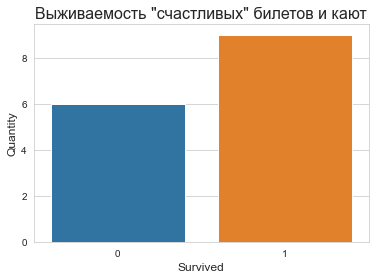

In [87]:
gr_by_happy = surv_data_happy.groupby(['Survived'])['Name'].count().reset_index().rename(columns={'Name' : 'Quantity'})

sns.barplot(x=gr_by_happy['Survived'], y=gr_by_happy['Quantity'])
plt.title('Выживаемость "счастливых" билетов и кают', fontsize = 16)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

Среди таких пассажиров выживших действительно больше.

Проанализируем, одинакова ли эта зависимость для мужчн и женщин.

Text(0, 0.5, 'Quantity')

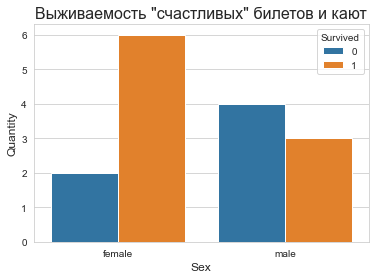

In [88]:
gr_by_happy = surv_data_happy.groupby(['Survived', 'Sex'])['Name'].count().reset_index().rename(columns={'Name' : 'Quantity'})

sns.barplot(x=gr_by_happy['Sex'], y=gr_by_happy['Quantity'], hue=gr_by_happy['Survived'])
plt.title('Выживаемость "счастливых" билетов и кают', fontsize = 16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

Женщины все также имели больше шансов выжить, а вот на выживаемость мужчин "счастливые" билеты и каюты не повлияли.

**Возможно, даже имя влияет на шансы выжить?**

Сравним число выживших и нет, в зависимости от первой буквы имени.

In [89]:
name_surv_data = surv_data
#Найдем первую букву имени
first_name_surv_data = surv_data.apply(lambda x: str(x['Name']).split()[-1][0], axis=1)
name_surv_data.insert(loc=len(name_surv_data.columns), column='First_let_name', \
                             value = first_name_surv_data.values.tolist())

gr_by_first_let_name = name_surv_data.groupby(['Survived', 'First_let_name'])['Name'].count() \
                                        .reset_index().rename(columns={'Name' : 'Quantity'})


Text(0, 0.5, 'Quantity')

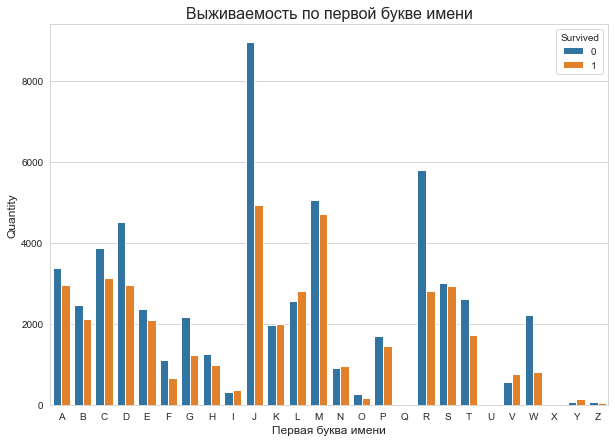

In [90]:
plt.figure(figsize=(10,7))
sns.barplot(x=gr_by_first_let_name['First_let_name'], y=gr_by_first_let_name['Quantity'], hue=gr_by_first_let_name['Survived'])

plt.title('Выживаемость по первой букве имени', fontsize = 16)
plt.xlabel('Первая буква имени', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

Зависимости нет, но можно сделать вывод, что обладатели имен, начинающихся на буквы "I", "L", "N", "V", "Y" выживали с немного большей долей вероятности.

# Summary

**Из проделанного анализа данных можно сделать некоторые выводы и влиянии различных параметров на выживаемость пассажира:**

1. Среди выживших больше женщин. (Хотя на борту больше было мужчин)


2. Можно отметить, что пассажиры заплатившие за билет больше имели немного большие шансы выжить.


3. Пассажиры, совершившие посадку на борт в портах Cherbourg (С) и Queenstown (Q) также повышали шанс выжить.


4. Возраст не оказывает ощутимого влияния на шанс выжить, однако в возрастной группе 60-99 лет выживших все же больше, чем невыживших, в остальных группах ситуация обратная.


5. Количество любых родственников на борту также не оказывало сильного влияния на шансы выжить, тем не менее некоторая зависимость есть. Например, пассажиры с одним родителем/ребенком на борту чаще выживали.


6. Для женщин также обнаружено, что их шанс оказаться в выжившими сильно увеличивался, если им попадался "счастливый" билет и "счастливая" каюта одновременно.